In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import math
from sklearn.impute import KNNImputer

In [2]:
df_imputed = pd.read_csv("cleaned_data_new.csv", index_col='customer_id')

In [3]:
df_imputed.select_dtypes(float)

,OUTSTANDING_BAL_LOAN_CURRENT,OUTSTANDING_BAL_LOAN_3M,OUTSTANDING_BAL_LOAN_6M,OUTSTANDING_BAL_LOAN_9M,OUTSTANDING_BAL_LOAN_12M,OUTSTANDING_BAL_CC_3M,OUTSTANDING_BAL_CC_6M,OUTSTANDING_BAL_CC_9M,OUTSTANDING_BAL_CC_12M,OUTSTANDING_BAL_ALL_3M,...,OUTSTANDING_BAL_CC_9M_12M_AUGMENTED,OUTSTANDING_BAL_CC_6M_12M_AUGMENTED,OUTSTANDING_BAL_CC_3M_12M_AUGMENTED,OUTSTANDING_BAL_ALL_3M_6M_AUGMENTED,OUTSTANDING_BAL_ALL_6M_9M_AUGMENTED,OUTSTANDING_BAL_ALL_9M_12M_AUGMENTED,OUTSTANDING_BAL_ALL_6M_12M_AUGMENTED,OUTSTANDING_BAL_ALL_3M_12M_AUGMENTED,OUTSTANDING_BAL_CC_CURRENT_AUGMENTED,OUTSTANDING_BAL_ALL_CURRENT_AUGMENTED
customer_id,,,,,,,,,,,,,,,,,,,,,
0,1.000059e+06,1.000023e+06,1.000012e+06,1.000008e+06,1.000006e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000025e+06,...,0.000000,0.000000e+00,0.000000e+00,20.000000,15.000000,13.333333,20.000000,40.000000,0.000000,70.000000
2,1.000080e+06,1.000087e+06,1.000052e+06,1.000039e+06,1.000029e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000087e+06,...,-3.833333,0.000000e+00,0.000000e+00,14.857143,15.000000,13.333333,18.518356,29.714286,0.000000,80.000000
3,1.000200e+06,1.000163e+06,1.000207e+06,1.000181e+06,1.000157e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000163e+06,...,0.000000,-2.507842e+00,0.000000e+00,7.903226,11.411043,11.560284,13.191489,11.941003,0.000000,200.000000
4,1.000220e+06,1.000243e+06,1.000260e+06,1.000254e+06,1.000238e+06,1.000020e+06,1.000020e+06,1.000020e+06,1.000020e+06,1.000263e+06,...,10.000000,1.000000e+01,1.000000e+01,9.655349,10.202429,10.623656,10.838710,10.193548,20.000000,240.000000
6,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25655,1.000310e+06,1.000317e+06,1.000307e+06,1.000312e+06,1.000289e+06,1.000000e+06,1.000000e+06,1.000024e+06,1.000001e+06,1.000317e+06,...,4.512821,1.047738e-09,1.047738e-09,10.326087,9.108911,10.306122,9.387755,9.693878,0.000000,310.000000
25656,1.000610e+06,1.000687e+06,1.000727e+06,1.000812e+06,1.000836e+06,1.000199e+06,1.000195e+06,1.000187e+06,1.000182e+06,1.000900e+06,...,10.275229,1.073394e+01,1.174312e+01,9.764919,9.226919,9.817090,9.058149,8.845209,250.000000,860.000000
25657,1.001120e+06,1.000937e+06,1.000900e+06,1.000896e+06,1.000898e+06,1.000017e+06,1.000013e+06,1.000009e+06,1.000020e+06,1.000953e+06,...,13.333333,2.000000e+01,2.500000e+01,10.437956,10.098280,9.993861,10.092081,10.534070,39.448819,1140.000000


In [4]:
df_imputed[df_imputed['label']==0]['SHORT_TERM_COUNT'].value_counts()

SHORT_TERM_COUNT
8     5696
5     4332
11    2273
2     1258
7      938
14     847
9      479
17     235
6      228
20      45
10      16
23       8
26       1
Name: count, dtype: int64

In [5]:
df_imputed[df_imputed['label']==1]['SHORT_TERM_COUNT'].value_counts()

SHORT_TERM_COUNT
2     1708
5      810
8      514
11     172
7      149
6      148
14      60
4       37
3       27
17      15
9        2
23       1
20       1
Name: count, dtype: int64

In [6]:
df_imputed[(df_imputed['SHORT_TERM_COUNT']<=6)&(df_imputed['label']==1)].count()

SHORT_TERM_COUNT                         2730
MID_TERM_COUNT                           2730
LONG_TERM_COUNT                          2730
SHORT_TERM_COUNT_BANK                    2730
MID_TERM_COUNT_BANK                      2730
                                         ... 
OUTSTANDING_BAL_ALL_9M_12M_AUGMENTED     2730
OUTSTANDING_BAL_ALL_6M_12M_AUGMENTED     2730
OUTSTANDING_BAL_ALL_3M_12M_AUGMENTED     2730
OUTSTANDING_BAL_CC_CURRENT_AUGMENTED     2730
OUTSTANDING_BAL_ALL_CURRENT_AUGMENTED    2730
Length: 145, dtype: int64

In [7]:
df_imputed[df_imputed['label']==0]['NUMBER_OF_RELATIONSHIP'].describe()

count    16356.000000
mean        14.955918
std          7.601015
min          5.000000
25%         10.000000
50%         14.000000
75%         19.000000
max         65.000000
Name: NUMBER_OF_RELATIONSHIP, dtype: float64

In [8]:
df_imputed[df_imputed['label']==1]['NUMBER_OF_RELATIONSHIP'].describe()

count    3644.000000
mean        7.931943
std         6.098224
min         2.000000
25%         2.000000
50%         7.000000
75%        11.000000
max        47.000000
Name: NUMBER_OF_RELATIONSHIP, dtype: float64

In [9]:
df_imputed[(df_imputed['NUMBER_OF_RELATIONSHIP']<=9)
          &(df_imputed['SHORT_TERM_COUNT']<=6)]['label'].sum()

2177

In [10]:
df_imputed[df_imputed['label']==0][['NUM_NEW_LOAN_TAKEN_3M','NUM_NEW_LOAN_TAKEN_6M','NUM_NEW_LOAN_TAKEN_9M','NUM_NEW_LOAN_TAKEN_12M']].describe()

,NUM_NEW_LOAN_TAKEN_3M,NUM_NEW_LOAN_TAKEN_6M,NUM_NEW_LOAN_TAKEN_9M,NUM_NEW_LOAN_TAKEN_12M
count,16356.000000,16356.000000,16356.000000,16356.000000
mean,3.926388,5.937271,7.248288,8.057227
std,2.816875,3.461220,3.863592,4.150681
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,4.000000,4.000000
50%,4.000000,6.000000,7.000000,7.000000
75%,5.000000,7.000000,10.000000,10.000000
max,25.000000,28.000000,46.000000,76.000000


In [11]:
df_imputed[df_imputed['label']==1][['NUM_NEW_LOAN_TAKEN_3M','NUM_NEW_LOAN_TAKEN_6M','NUM_NEW_LOAN_TAKEN_9M','NUM_NEW_LOAN_TAKEN_12M']].describe()

,NUM_NEW_LOAN_TAKEN_3M,NUM_NEW_LOAN_TAKEN_6M,NUM_NEW_LOAN_TAKEN_9M,NUM_NEW_LOAN_TAKEN_12M
count,3644.000000,3644.000000,3644.000000,3644.000000
mean,2.625960,3.498079,3.964325,4.260977
std,2.483168,3.268352,3.706771,3.966744
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,3.000000,4.000000
75%,4.000000,5.000000,7.000000,7.000000
max,19.000000,22.000000,22.000000,22.000000


In [12]:
enqueries_cols = [col for col in df_imputed.columns if 'ENQUIRIES' in col]
df_imputed[df_imputed['label']==0][enqueries_cols].describe()

,ENQUIRIES_3M,ENQUIRIES_6M,ENQUIRIES_9M,ENQUIRIES_12M,ENQUIRIES_FROM_BANK_3M,ENQUIRIES_FROM_NON_BANK_3M,ENQUIRIES_FOR_LOAN_3M,ENQUIRIES_FOR_CC_3M,ENQUIRIES_FROM_BANK_FOR_LOAN_3M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M,...,ENQUIRIES_FROM_BANK_3M_6M,ENQUIRIES_FROM_BANK_6M_9M,ENQUIRIES_FROM_BANK_9M_12M,ENQUIRIES_FROM_BANK_6M_12M,ENQUIRIES_FROM_BANK_3M_12M,ENQUIRIES_FROM_NON_BANK_3M_6M,ENQUIRIES_FROM_NON_BANK_6M_9M,ENQUIRIES_FROM_NON_BANK_9M_12M,ENQUIRIES_FROM_NON_BANK_6M_12M,ENQUIRIES_FROM_NON_BANK_3M_12M
count,16356.000000,16356.000000,16356.000000,16356.000000,16356.000000,16356.000000,16356.000000,16356.000000,16356.000000,16356.000000,...,16356.000000,16356.000000,16356.000000,16356.000000,16356.000000,16356.000000,16356.000000,16356.000000,16356.000000,16356.000000
mean,14.120139,18.792125,23.332600,27.511372,6.049156,10.027880,12.233981,3.830032,4.455246,9.745659,...,3.727745,4.105710,4.384996,3.901504,3.384691,6.545732,6.682869,6.793898,6.494375,6.096539
std,9.611051,15.812678,22.019208,28.305968,8.157193,4.196265,6.158865,4.021294,4.688422,3.519852,...,1.667732,1.812154,1.888041,1.735037,1.510010,0.906608,0.763507,0.613724,0.949037,1.241260
min,7.000000,7.000000,7.000000,7.000000,2.000000,7.000000,7.000000,2.000000,2.000000,7.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000
25%,7.000000,7.000000,9.000000,12.000000,2.000000,7.000000,7.000000,2.000000,2.000000,7.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,7.000000,7.000000,7.000000,6.000000,5.000000
50%,12.000000,12.000000,17.000000,17.000000,2.000000,7.000000,12.000000,2.000000,2.000000,7.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,7.000000,7.000000,7.000000,7.000000,7.000000
75%,17.000000,22.000000,27.000000,33.250000,7.000000,12.000000,15.000000,3.000000,7.000000,12.000000,...,4.000000,6.000000,7.000000,5.000000,3.000000,7.000000,7.000000,7.000000,7.000000,7.000000
max,132.000000,222.000000,317.000000,412.000000,107.000000,67.000000,102.000000,52.000000,87.000000,52.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [13]:
df_imputed[df_imputed['label']==1][enqueries_cols].describe()

,ENQUIRIES_3M,ENQUIRIES_6M,ENQUIRIES_9M,ENQUIRIES_12M,ENQUIRIES_FROM_BANK_3M,ENQUIRIES_FROM_NON_BANK_3M,ENQUIRIES_FOR_LOAN_3M,ENQUIRIES_FOR_CC_3M,ENQUIRIES_FROM_BANK_FOR_LOAN_3M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M,...,ENQUIRIES_FROM_BANK_3M_6M,ENQUIRIES_FROM_BANK_6M_9M,ENQUIRIES_FROM_BANK_9M_12M,ENQUIRIES_FROM_BANK_6M_12M,ENQUIRIES_FROM_BANK_3M_12M,ENQUIRIES_FROM_NON_BANK_3M_6M,ENQUIRIES_FROM_NON_BANK_6M_9M,ENQUIRIES_FROM_NON_BANK_9M_12M,ENQUIRIES_FROM_NON_BANK_6M_12M,ENQUIRIES_FROM_NON_BANK_3M_12M
count,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,...,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000
mean,12.424533,15.157519,17.322997,19.206092,4.894072,9.561745,10.975851,3.442097,3.759056,9.222283,...,3.228869,3.559550,3.737925,3.477223,3.096048,6.253293,6.329583,6.374588,6.182492,5.949506
std,9.206245,13.820698,17.538623,21.214137,6.792140,5.085843,6.372288,3.570581,3.923453,4.323075,...,1.777117,1.981529,2.073103,1.928670,1.670199,1.562954,1.540662,1.518636,1.587735,1.659343
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,7.000000,7.000000,7.000000,7.000000,2.000000,7.000000,7.000000,2.000000,2.000000,7.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,7.000000,7.000000,7.000000,6.000000,5.000000
50%,12.000000,12.000000,12.000000,12.000000,2.000000,7.000000,11.000000,2.000000,2.000000,7.000000,...,2.000000,3.000000,3.000000,3.000000,2.000000,7.000000,7.000000,7.000000,7.000000,7.000000
75%,17.000000,17.000000,22.000000,22.000000,4.000000,12.000000,12.000000,2.000000,3.000000,12.000000,...,3.000000,5.000000,7.000000,5.000000,3.000000,7.000000,7.000000,7.000000,7.000000,7.000000
max,92.000000,152.000000,207.000000,227.000000,87.000000,57.000000,52.000000,47.000000,42.000000,37.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [14]:
df_imputed[df_imputed['label']==0]['OUTSTANDING_BAL_LOAN_9M_12M_AUGMENTED'].describe()

count    16356.000000
mean        11.310947
std          2.216840
min        -10.000000
25%         10.098028
50%         11.532553
75%         13.333333
max         13.333333
Name: OUTSTANDING_BAL_LOAN_9M_12M_AUGMENTED, dtype: float64

In [15]:
df_imputed[df_imputed['label']==1]['OUTSTANDING_BAL_LOAN_9M_12M_AUGMENTED'].describe()

count    3644.000000
mean        7.555323
std         5.726576
min       -10.000000
25%         0.000000
50%        10.000000
75%        13.333333
max        13.333333
Name: OUTSTANDING_BAL_LOAN_9M_12M_AUGMENTED, dtype: float64

In [16]:
df_imputed.corrwith(df_imputed['label']).apply(lambda x: abs(x)).sort_values(ascending=False).head(20)

label                                    1.000000
OUTSTANDING_BAL_LOAN_9M_12M_AUGMENTED    0.416869
OUTSTANDING_BAL_LOAN_9M_12M              0.416869
OUTSTANDING_BAL_ALL_9M_12M_AUGMENTED     0.374054
OUTSTANDING_BAL_ALL_9M_12M               0.374054
OUTSTANDING_BAL_LOAN_6M_9M_AUGMENTED     0.370420
OUTSTANDING_BAL_LOAN_6M_9M               0.370420
NUMBER_OF_LOANS                          0.363330
NUMBER_OF_RELATIONSHIP                   0.346098
SHORT_TERM_COUNT                         0.344630
NUM_NEW_LOAN_TAKEN_12M                   0.335286
OUTSTANDING_BAL_ALL_6M_9M_AUGMENTED      0.329230
OUTSTANDING_BAL_ALL_6M_9M                0.329230
NUM_NEW_LOAN_TAKEN_9M                    0.313821
OUTSTANDING_BAL_LOAN_6M_12M_AUGMENTED    0.291537
OUTSTANDING_BAL_LOAN_6M_12M              0.291537
NUMBER_OF_LOANS_NON_BANK                 0.273953
OUTSTANDING_BAL_LOAN_3M_6M               0.272104
OUTSTANDING_BAL_LOAN_3M_6M_AUGMENTED     0.272104
SHORT_TERM_COUNT_BANK                    0.270771


In [17]:
df_imputed['Predict'] = 0
df_imputed.loc[(df_imputed['NUMBER_OF_RELATIONSHIP']<=9)
          &(df_imputed['SHORT_TERM_COUNT']<=6)
          &(df_imputed['NUM_NEW_LOAN_TAKEN_6M']<=3)
          &(df_imputed['NUMBER_OF_LOANS']<=6),'Predict'] = 1

df_imputed.loc[(df_imputed['NUMBER_OF_RELATIONSHIP']<=9)
          &(df_imputed['SHORT_TERM_COUNT']<=6)&(df_imputed['NUM_NEW_LOAN_TAKEN_6M']<=4),'Predict']

customer_id
0        0
6        1
8        0
9        0
10       1
        ..
25551    1
25572    0
25616    0
25624    0
25658    0
Name: Predict, Length: 4222, dtype: int64

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
print('Accuracy: ' + str(accuracy_score(df_imputed['Predict'],df_imputed['label'])*100) +'%')
print('Recall score', recall_score(df_imputed['Predict'],df_imputed['label']))

Accuracy: 86.545%
Recall score 0.7047700902449506


<Axes: >

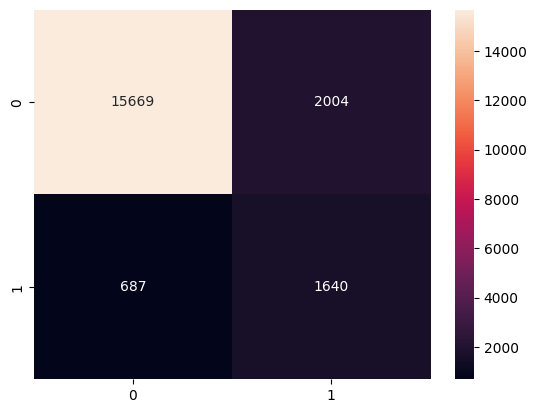

In [19]:
cm = confusion_matrix(df_imputed['Predict'],df_imputed['label'])
sns.heatmap(cm, annot=True, fmt='d')

In [25]:
df_imputed[(df_imputed['NUMBER_OF_RELATIONSHIP']<=9)
          &(df_imputed['SHORT_TERM_COUNT']<=6)
          &(df_imputed['NUM_NEW_LOAN_TAKEN_6M']<=3)
          &(df_imputed['NUMBER_OF_LOANS']<=6)]['label'].sum()/df_imputed[(df_imputed['NUMBER_OF_RELATIONSHIP']<=9)
          &(df_imputed['SHORT_TERM_COUNT']<=6)
          &(df_imputed['NUM_NEW_LOAN_TAKEN_6M']<=3)
          &(df_imputed['NUMBER_OF_LOANS']<=6)]['label'].shape[0]

0.7047700902449506

In [54]:
filtered_df = df_imputed[(df_imputed['NUMBER_OF_RELATIONSHIP']<=9)
          &(df_imputed['NUM_NEW_LOAN_TAKEN_6M']<=3)
          &(df_imputed['NUMBER_OF_LOANS']<=4)
          &(df_imputed['SHORT_TERM_COUNT']<=2)
          &(df_imputed['MID_TERM_COUNT']<=2)]

In [55]:
filtered_df['label'].sum()/filtered_df['label'].shape[0]

1.0

In [56]:
filtered_df[filtered_df['label']==1].describe()

,SHORT_TERM_COUNT,MID_TERM_COUNT,LONG_TERM_COUNT,SHORT_TERM_COUNT_BANK,MID_TERM_COUNT_BANK,LONG_TERM_COUNT_BANK,SHORT_TERM_COUNT_NON_BANK,MID_TERM_COUNT_NON_BANK,LONG_TERM_COUNT_NON_BANK,NUMBER_OF_LOANS,...,OUTSTANDING_BAL_CC_6M_12M_AUGMENTED,OUTSTANDING_BAL_CC_3M_12M_AUGMENTED,OUTSTANDING_BAL_ALL_3M_6M_AUGMENTED,OUTSTANDING_BAL_ALL_6M_9M_AUGMENTED,OUTSTANDING_BAL_ALL_9M_12M_AUGMENTED,OUTSTANDING_BAL_ALL_6M_12M_AUGMENTED,OUTSTANDING_BAL_ALL_3M_12M_AUGMENTED,OUTSTANDING_BAL_CC_CURRENT_AUGMENTED,OUTSTANDING_BAL_ALL_CURRENT_AUGMENTED,Predict
count,1377.0,1377.0,1377.0,1377.0,1377.0,1377.0,1377.0,1377.0,1377.0,1377.000000,...,1377.000000,1377.000000,1.377000e+03,1377.000000,1377.000000,1377.000000,1.377000e+03,1377.000000,1377.000000,1377.0
mean,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.023239,...,2.346367,3.449138,2.326311e+00,2.788922,3.255344,3.286077,3.927835e+00,14.587267,14.908013,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181355,...,5.979752,9.833798,5.388871e+00,5.105204,5.042380,6.435780,9.983592e+00,59.584550,60.287402,0.0
min,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.000000,...,-0.666667,-1.566667,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,-1.166667,0.000000,1.0
25%,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.0
50%,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.0
75%,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.000000,...,0.000000,0.000000,1.047738e-09,3.088235,6.666667,2.162162,1.047738e-09,0.000000,0.000000,1.0
max,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,4.000000,...,20.000000,40.000000,2.000000e+01,15.000000,13.333333,20.000000,4.000000e+01,770.000000,770.000000,1.0


In [57]:
filtered_df[filtered_df['label']==0].describe()

,SHORT_TERM_COUNT,MID_TERM_COUNT,LONG_TERM_COUNT,SHORT_TERM_COUNT_BANK,MID_TERM_COUNT_BANK,LONG_TERM_COUNT_BANK,SHORT_TERM_COUNT_NON_BANK,MID_TERM_COUNT_NON_BANK,LONG_TERM_COUNT_NON_BANK,NUMBER_OF_LOANS,...,OUTSTANDING_BAL_CC_6M_12M_AUGMENTED,OUTSTANDING_BAL_CC_3M_12M_AUGMENTED,OUTSTANDING_BAL_ALL_3M_6M_AUGMENTED,OUTSTANDING_BAL_ALL_6M_9M_AUGMENTED,OUTSTANDING_BAL_ALL_9M_12M_AUGMENTED,OUTSTANDING_BAL_ALL_6M_12M_AUGMENTED,OUTSTANDING_BAL_ALL_3M_12M_AUGMENTED,OUTSTANDING_BAL_CC_CURRENT_AUGMENTED,OUTSTANDING_BAL_ALL_CURRENT_AUGMENTED,Predict
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
